In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('pnad2015.csv')

In [ ]:
#df = pd.read_csv('rend12.csv')

changing the category and transform variables in dummies

In [ ]:
df["V0404"]=df["V0404"].astype('category')

KeyError: ignored

In [ ]:
df["V0302"]=df["V0302"].astype('category')


In [ ]:
df=pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,V4719,V8005,V4803,marr,lfp,V0404_0,V0404_4,V0404_6,V0404_8,V0302_4
0,0,0,0,800.0,23,12,0.0,1.0,0,0,0,1,0
1,1,1,1,1150.0,23,12,1.0,1.0,0,0,0,0,1
2,2,2,7,880.0,18,12,0.0,1.0,0,0,0,1,1
3,3,3,8,3500.0,46,6,0.0,1.0,0,0,0,0,0
4,4,4,11,150.0,47,9,1.0,1.0,0,0,0,1,1


droping out the base

In [ ]:
X = df.drop(["V0404_2"],axis=1)

In [ ]:
X = df.drop(["V0302_2"],axis=1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104281 entries, 0 to 104280
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      104281 non-null  int64  
 1   Unnamed: 0.1    104281 non-null  int64  
 2   Unnamed: 0.1.1  104281 non-null  int64  
 3   V4719           104281 non-null  float64
 4   V8005           104281 non-null  int64  
 5   V4803           104281 non-null  int64  
 6   marr            104281 non-null  float64
 7   lfp             104281 non-null  float64
 8   V0404_0         104281 non-null  int64  
 9   V0404_4         104281 non-null  int64  
 10  V0404_6         104281 non-null  int64  
 11  V0404_8         104281 non-null  int64  
 12  V0302_4         104281 non-null  uint8  
dtypes: float64(3), int64(9), uint8(1)
memory usage: 9.6 MB


In [ ]:
df["logrend"]=np.log(df["rend"])

excluding NAs

In [ ]:
df=df[df['V4719']<999999999999]

In [ ]:
df.isna().sum()

V4719        0
V0302        0
V8005        0
V0404        0
V4011    57796
V4803        0
dtype: int64

In [ ]:
df=df.dropna()

excluding category 17 in years of study

In [ ]:
df=df[df['V4803']<17]

plotting monthly income histogram

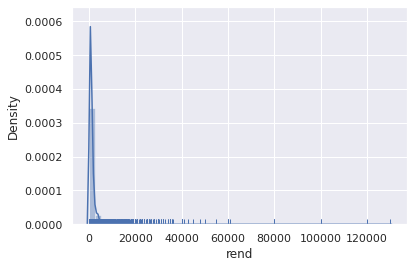

In [ ]:
sns.distplot(df["rend"],rug=True)

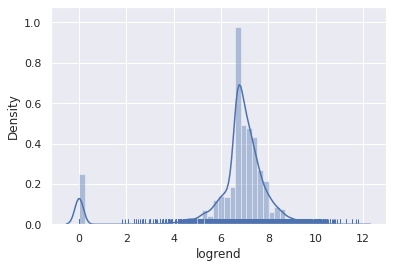

In [ ]:
sns.distplot(df["logrend"],rug=True)

selecting individuals older than 14 years old

In [ ]:
X=df[df['V8005']>=14]

transform civil status in dummy marriage status

In [ ]:
X['marr'] = np.where(X['V4011'] != 0, 1, X['V4011'] )  

In [ ]:
censored variable

In [ ]:
X['lfp'] = np.where(X['V4719'] > 0, 1, X['V4719'] )  

In [ ]:
X.to_csv('rend15.csv')